## Unidad 4: Hipótesis y Correlación
### Actividad 07

## Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías básicas para el análisis de datos
* Descarge e importe el archivo `nations.csv`. _warning_: va a encontrar un error en el formato ¿Cómo lo podemos solucionar?.


* La base de datos contiene información a nivel mundial sobre demografía:
    * `country`: País.
    * `region`: Continente del país.
    * `gdp`: Producto Interno Bruto per cápita, precios 2005.
    * `school`: Promedio años de escolaridad.
    * `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
    * `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
    * `life`: Esperanza de vida al nacer.
    * `pop`: Población total.
    * `urban`: Porcentaje de población urbana.
    * `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
    * `literacy`: Tasa de alfabetismo.
    * `co2`: Toneladas de Co2 mitidas per cápita.
    * `gini`: Coeficiente de desigualdad del ingreso.


* Apellidos desde la A hasta la N: Enfocarse en las variables `chldmort`, `adfert` y `life`.
* Apellidos desde la M hasta la Z: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nations.csv', encoding='latin1')

In [3]:
df = df.drop(columns="Unnamed: 0")

In [4]:
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


Según requerimiento, por mi apellido me debo enfocar en las variables ``chldmort``, ``adfert`` y ``life``

## Ejercicio 2:A continuación se presenta una serie de gráficos construídos con `matplotlib`. Se le pide refactorizarlos utilizando `seaborn`.
* Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.



```python
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

binarize_histogram(df, 'adfert')
```


![png](gfx/activities-w4_4_0.png)



```python
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
        
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
        
grouped_boxplot(df, 'adfert', 'region')
```

![png](gfx/activities-w4_5_0.png)


```python
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
        
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

grouped_scatterplot(df, 'school', 'adfert', 'region')
```


![png](gfx/activities-w4_7_0.png)

In [5]:
def sns_histogram(dataframe, variable):
    
    """
    Función que retorna histograma de la librería seaborn
    """
    
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    sns.set(style="darkgrid")
    grid = sns.FacetGrid(tmp, col = 'binarize', col_wrap=2, 
                         sharex=False, sharey=False)
    axes = grid.axes.flatten()
    axes[0].set_title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    axes[1].set_title("{0} >= {1}".format(variable, round(np.mean(hist_1), 3)))
    grid = grid.map(plt.hist, variable, color = 'dodgerblue', alpha = 0.8)
    grid.fig.set_size_inches(10,10)

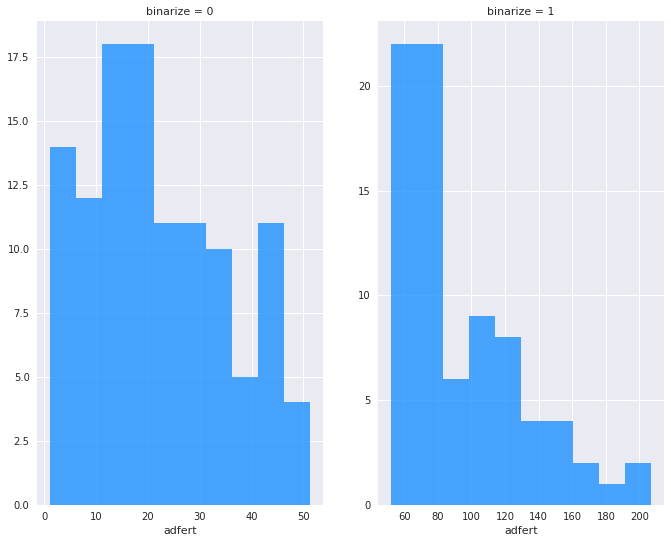

In [6]:
sns_histogram(df,'adfert')

/home/sebastiancz/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


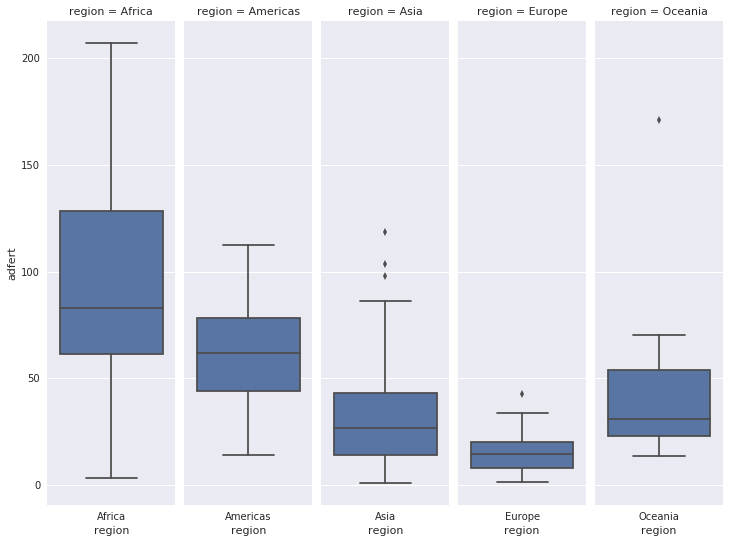

In [7]:
sns.set(style="darkgrid")
grid = sns.FacetGrid(df, col = 'region', col_wrap=5, sharey=True,sharex=False).map(sns.boxplot,'region','adfert')
grid.fig.set_size_inches(10,10)

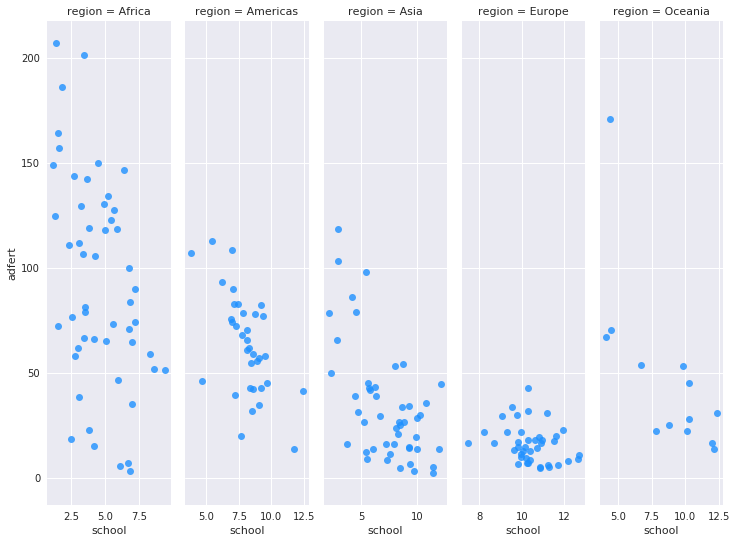

In [8]:
sns.set(style="darkgrid")
grid = sns.FacetGrid(df, col = 'region', sharey=True,sharex=False).map(sns.regplot,'school','adfert', color = 'dodgerblue', fit_reg=False)
grid.fig.set_size_inches(10,10)

## Ejercicio 3: Genere un heatmap entre todas las variables.
* En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

In [9]:
df_corr = df.loc[:,['chldmort','adfert','life']].corr()

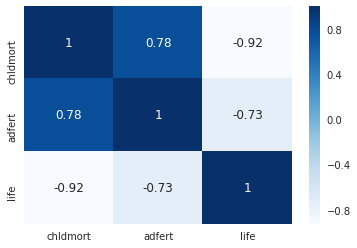

In [10]:
sns.heatmap(df_corr, cmap='Blues', annot=True);

## Ejercicio 4: En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones
* _tip_: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = `df.loc[:,['variables', 'a', 'agregar']]`. No olvide agregar la variable `region`.
* _tip_: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.


In [11]:
df_subsample = df.loc[:,['region','chldmort','adfert','life']]

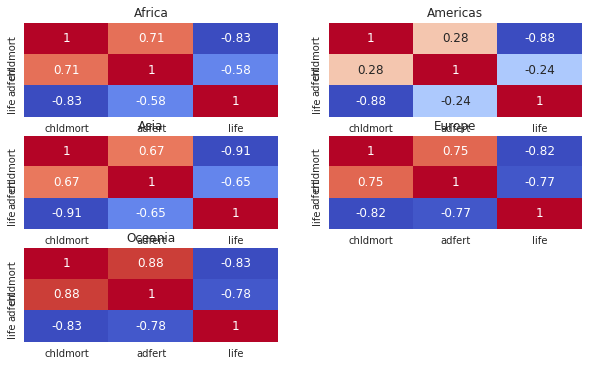

In [12]:
plt.figure(figsize = (10,10))
for index,value in enumerate (df_subsample['region'].unique()):
    tmp_corr = df_subsample[df_subsample['region'] == value].corr()
    plt.subplot(5,2, index + 1)
    plt.title(value)
    sns.heatmap(tmp_corr, cbar = False, annot = True, cmap = 'coolwarm')